# Checking Working Directory

In [1]:
import os

In [2]:
%pwd

'c:\\Users\\2021ICTS28\\Desktop\\telco_customer_churn\\data\\raw'

In [3]:
os.chdir("../../")

In [4]:
%pwd

'c:\\Users\\2021ICTS28\\Desktop\\telco_customer_churn'

In [5]:
!pip install -r requirements.txt

# Importing Dependencies

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import openai, groq
from enum import Enum
from dotenv import load_dotenv
from pydantic import BaseModel

# Getting Basic Information

In [7]:
os.getcwd()

'c:\\Users\\2021ICTS28\\Desktop\\telco_customer_churn'

In [8]:
df = (pd.read_csv(os.path.join("C:\\Users\\2021ICTS28\\Desktop\\telco_customer_churn\\data\\raw\\telco_data.csv")))

In [9]:
df.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 15)

In [11]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

# Handling Missing Values

In [12]:
df_cpy = df.copy()
df_cpy.shape

(10000, 15)

# Deleting 

In [13]:
df_cpy = df_cpy.dropna(axis=0)
df_cpy.shape

(9337, 15)

# Imputation

In [14]:
df_cpy.columns

Index(['RowNumber', 'CustomerId', 'Firstname', 'Lastname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

FOR AGE

In [ ]:
mean_age = round(df_cpy['Age'].mean(), 2)
median_age = round(df_cpy['Age'].median(), 2)

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")

Mean Age: 38.91
Median Age: 37.0


<Axes: xlabel='Age', ylabel='Count'>

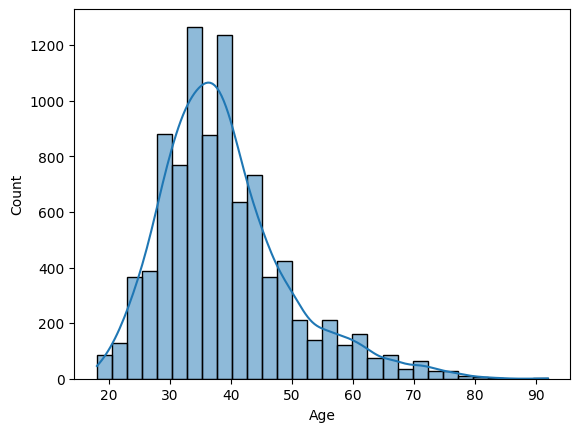

In [23]:
sns.histplot(df_cpy['Age'], bins=30, kde=True)

In [24]:
df_imputed = df.copy()

In [39]:
df_imputed.loc[:, 'Age'] = df_imputed['Age'].fillna(median_age)
df_imputed.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,37.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


FOR GENDER

In [ ]:
class Gender(str, Enum):
    Male = 'Male'
    Female = 'Female'

class GenderPrediction(BaseModel):
    firstname: str
    lastname: str
    pred_gender: Gender
    
def predict_gender(
    firstname: str,
    lastname: str
):
    prompt = f"""
                What is the most probable gender(Male/Female) for a person
                with the first name '{firstname}' and last name '{lastname}'?  
                
                Your answer should consist of only one word: 'Male' or 'Female'.
             """   
             
             
    response = groq.Groq().chat.completions.create(
        model="groq-alpha-001",
        messages=[{"role": "user", "content": prompt}]
    )
    
    pred_gender = response.choices[0].message.content.strip()
    
    return pred_gender

In [45]:
predict_gender(
    firstname="John",
    lastname="Doe"
)

GroqError: The api_key client option must be set either by passing api_key to the client or by setting the GROQ_API_KEY environment variable